In [1]:
# Libraries 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the data
data = pd.read_csv("/Users/rashmetasai/Documents/classData.csv")

In [3]:
# Combing all fault bits into one Fault_Type:
data['Fault_Type'] = (
    data['G'].astype(str) +
    data['C'].astype(str) +
    data['B'].astype(str) +
    data['A'].astype(str)
)

fault_map = {
    '0000': 'NO Fault',
    '1001': 'Line A to Ground Fault',
    '0110': 'Line B to Line C Fault',
    '1011': 'Line A Line B to Ground Fault',
    '0111': 'Line A Line B Line C',
    '1111': 'Line A Line B Line C to Ground Fault'
}

data['Fault_Type'] = data['Fault_Type'].map(fault_map)

data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [4]:
# Label encode the Fault type
encoder = LabelEncoder()
data['Fault_Label'] = encoder.fit_transform(data['Fault_Type'])

X = data.drop(['Fault_Type', 'Fault_Label'], axis=1)
y = data['Fault_Label']

In [5]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size = 0.20,
    random_state = 42
    )

In [6]:
# Data points for each fault category 
data['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



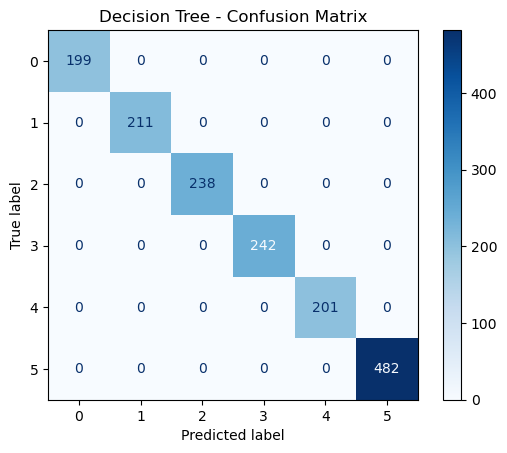

In [7]:
# Decision Tree classification 
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

# Predictions
y_pred_dec = decision.predict(X_test)

# Training and test accuracy 
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)

print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))

# Confusion matrix
cm_dec = confusion_matrix(y_test, y_pred_dec)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dec)
disp.plot(cmap = 'Blues')

plt.title('Decision Tree - Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


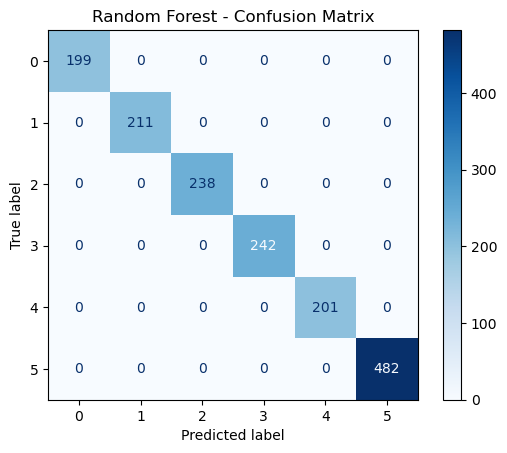

In [8]:
# Random Forest classification 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest.predict(X_test)

# Training and test accuracy 
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)

disp.plot(cmap = 'Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()

In [9]:
# Comparing Models 
models = pd.DataFrame({
    
    'Model': ['Decision Tree','Random Forest'],
    
    'Training Accuracy':
    [decision_train, random_forest_train],
    
    'Model Accuracy Score': 
    [decision_accuracy, random_forest_accuracy]
})

pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Decision Tree,100.0,100.0
1,Random Forest,100.0,100.0
